In [3]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 366.7 kB/s eta 0:00:0000:0100:02


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [9]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")

<Axes: xlabel='Date'>

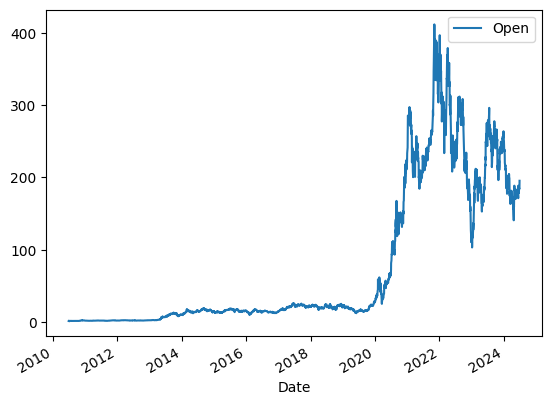

In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.plot(x="Date", y="Open")

In [13]:
#tesla.dividends.plot()

Use Webscraping to Extract Tesla Revenue Data

In [25]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')
table = []

i = 0
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    
    # Finally we append the data of each row to the table
    #dataDF = dataDF.append(, ignore_index=True) 
    table.append( {"Date":date, "Revenue":Open.replace(',|\$',"")})
    i = i + 1

pd.DataFrame(columns=["Date", "Revenue"])

dataDF = pd.DataFrame(table)
dataDF.dropna(inplace=True)

dataDF = dataDF[dataDF['Revenue'] != ""]
dataDF.head

<bound method NDFrame.head of     Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112>